In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from scipy import log,exp,sqrt,stats

In [2]:
# Importing pickle file
data = np.load('/Users/louisribieras/Desktop/IXPERIENCE/my_invictus/data/latest_coin_data.pkl')
# Drop Null Values
data = data.dropna()
data.shape

(133, 916)

In [3]:
# Initialize a close_price list
volumes_list = list()
# Making a list of all close_prices
for date in data.index:
    for column in data.columns:
        volumes_list.append(data[column][date]['volume'])

# Splitting list into 133 lists (one per coin)
volumes_list = [volumes_list[i:i+916] for i  in range(0, len(volumes_list), 916)]        

In [4]:
volumes = pd.DataFrame(data = volumes_list, index = data.index, columns = data.columns)
# Reordering column index
volumes = volumes[volumes.columns[::-1]]
print('Shape of Volumes df: ', volumes.shape)

Shape of Volumes df:  (133, 916)


In [5]:
# Quarters for 2016, avg daily trading volume, top 10
vol_q1_16 = pd.DataFrame(data = volumes.loc[:,'Jan 01, 2016':'Mar 31, 2016'].mean(axis=1).sort_values(ascending = False).head(10))
vol_q2_16 = pd.DataFrame(data = volumes.loc[:,'Apr 01, 2016':'Jun 30, 2016'].mean(axis=1).sort_values(ascending = False).head(10))
vol_q3_16 = pd.DataFrame(data = volumes.loc[:,'Jul 01, 2016':'Sep 30, 2016'].mean(axis=1).sort_values(ascending = False).head(10))
vol_q4_16 = pd.DataFrame(data = volumes.loc[:,'Oct 01, 2016':'Dec 31, 2016'].mean(axis=1).sort_values(ascending = False).head(10))
# Quarters for 2017, avg daily trading volume, top 10
vol_q1_17 = pd.DataFrame(data = volumes.loc[:,'Jan 01, 2016':'Mar 31, 2017'].mean(axis=1).sort_values(ascending = False).head(10))
vol_q2_17 = pd.DataFrame(data = volumes.loc[:,'Apr 01, 2016':'Jun 30, 2017'].mean(axis=1).sort_values(ascending = False).head(10))
vol_q3_17 = pd.DataFrame(data = volumes.loc[:,'Jul 01, 2016':'Sep 30, 2017'].mean(axis=1).sort_values(ascending = False).head(10))
vol_q4_17 = pd.DataFrame(data = volumes.loc[:,'Oct 01, 2016':'Dec 31, 2017'].mean(axis=1).sort_values(ascending = False).head(10))
# Quarters for 2018, avg daily trading volume, top 10
vol_q1_18 = pd.DataFrame(data = volumes.loc[:,'Jan 01, 2016':'Mar 31, 2018'].mean(axis=1).sort_values(ascending = False).head(10))
vol_q2_18 = pd.DataFrame(data = volumes.loc[:,'Apr 01, 2016':'Jun 30, 2018'].mean(axis=1).sort_values(ascending = False).head(10))

In [6]:
# List of the vol_quarters CLOSE DATES
close_dates = ['Mar 31, 2016', 'Jun 30, 2016', 'Sep 30, 2016', 'Dec 31, 2016',
'Mar 31, 2017', 'Jun 30, 2017', 'Sep 30, 2017', 'Dec 31, 2017',
'Mar 31, 2018', 'Jun 30, 2018']

# List of the vol_quarters LABELS
vol_list_labels = ['vol_q1_16', 'vol_q2_16', 'vol_q3_16', 'vol_q4_16',
           'vol_q1_17', 'vol_q2_17', 'vol_q3_17', 'vol_q4_17',
           'vol_q1_18', 'vol_q2_18']

# List of the vol_quarters DATAFRAMES
vol_list = [vol_q1_16, vol_q2_16, vol_q3_16, vol_q4_16,
            vol_q1_17, vol_q2_17, vol_q3_17, vol_q4_17,
            vol_q1_18, vol_q2_18]

In [7]:
# Name Volume column
for df in vol_list:
    df.columns = ['Volume']

In [8]:
# Calculating Proportion of volume in total top 10
for df in vol_list:
    df['Proportion'] = (df['Volume'])/(df['Volume'].sum())

In [9]:
# for df in vol_list:
#     # n = Number of coins parameter
#     n = 10
#     df['Amount of'] = df['Proportion']*n

In [10]:
# Initialize a close_price list
close_list = list()
# Making a list of all close_prices
for date in data.index:
    for column in data.columns:
        close_list.append(data[column][date]['close_price'])

# Splitting list into 133 lists (one per coin)
close_list2 = [close_list[i:i+916] for i  in range(0, len(close_list), 916)]
# Making a Dataframe
close_df = pd.DataFrame(data = close_list2, index = data.index, columns = data.columns)

In [11]:
# Close_price per Quarter end dates DATAFRAME
quarter_close_data = close_df[close_dates]
qclose_df = pd.DataFrame(data = quarter_close_data)
# Relabelling columns
qclose_df.columns = vol_list_labels

In [12]:
# tv = list()
# # DATAFRAME of totals and returns per Quarter
# for df in vol_list:
#     tv.append(sum(df['Volume']))

# tv = pd.DataFrame(data = tv, index = vol_list_labels, columns = ['Totals'])

In [13]:
close_list3 = list()

for df in vol_list:
    for coin in df.index:
        close_list3.append(qclose_df.loc[coin])

In [14]:
qclose_df2 = pd.DataFrame(data = close_list3)

In [15]:
qlabels = ['q2_16_close', 'q3_16_close', 'q4_16_close', 
           'q1_17_close', 'q2_17_close', 'q3_17_close', 'q4_17_close', 
           'q1_18_close', 'q2_18_close']

In [16]:
q2_16_close = pd.DataFrame(data = qclose_df2.iloc[10:20,0:2])
q3_16_close = pd.DataFrame(data = qclose_df2.iloc[20:30,1:3])
q4_16_close = pd.DataFrame(data = qclose_df2.iloc[30:40,2:4])

q1_17_close = pd.DataFrame(data = qclose_df2.iloc[40:50,3:5])
q2_17_close = pd.DataFrame(data = qclose_df2.iloc[50:60,4:6])
q3_17_close = pd.DataFrame(data = qclose_df2.iloc[60:70,5:7])
q4_17_close = pd.DataFrame(data = qclose_df2.iloc[70:80,6:8])

q1_18_close = pd.DataFrame(data = qclose_df2.iloc[80:90,7:9])
q2_18_close = pd.DataFrame(data = qclose_df2.iloc[90:100,8:10])

In [17]:
# Joining volumes and proportions with close prices for both current and past quarter
q2_16_final = vol_q2_16.join(q2_16_close)
q3_16_final = vol_q3_16.join(q3_16_close)
q4_16_final = vol_q4_16.join(q4_16_close)

q1_17_final = vol_q1_17.join(q1_17_close)
q2_17_final = vol_q2_17.join(q2_17_close)
q3_17_final = vol_q3_17.join(q3_17_close)
q4_17_final = vol_q4_17.join(q4_17_close)

q1_18_final = vol_q1_18.join(q1_18_close)
q2_18_final = vol_q2_18.join(q2_18_close)

In [19]:
final_dfs = [q2_16_final, q3_16_final, q4_16_final, 
                   q1_17_final, q2_17_final, q3_17_final, 
                   q4_17_final, q1_18_final, q2_18_final]

quarter_index = ['q2_16','q3_16','q4_16',
                 'q1_17','q2_17','q3_17','q4_17',
                 'q1_18','q2_18']

In [20]:
# Columns for close_dif for each coin in each quarter
for df in final_dfs:
    df['close_dif'] = (((df.iloc[:,3]) - (df.iloc[:,2])))

In [ ]:
q2_16_final['close_dif'] = (q2_16_final.iloc[:,3] - q2_16_final.iloc[:,2])
q3_16_final['close_dif'] = (q3_16_final.iloc[:,3] - q3_16_final.iloc[:,2])
q4_16_final['close_dif'] = (q4_16_final.iloc[:,3] - q4_16_final.iloc[:,2])

q1_17_final['close_dif'] = (q1_17_final.iloc[:,3] - q1_17_final.iloc[:,2])
q2_17_final['close_dif'] = (q2_17_final.iloc[:,3] - q2_17_final.iloc[:,2])
q3_17_final['close_dif'] = (q3_17_final.iloc[:,3] - q3_17_final.iloc[:,2])
q4_17_final['close_dif'] = (q4_17_final.iloc[:,3] - q4_17_final.iloc[:,2])

q1_18_final['close_dif'] = (q1_18_final.iloc[:,3] - q1_18_final.iloc[:,2])
q2_18_final['close_dif'] = (q2_18_final.iloc[:,3] - q2_18_final.iloc[:,2])

In [21]:
q_returns = list()

for df in final_dfs:
    q_returns.append(df['Proportion'].dot(df['close_dif'].T))

In [22]:
Q_Returns = pd.DataFrame(data = q_returns, index = quarter_index, columns = ['Q_Returns'])

In [23]:
q2_16_final

,Volume,Proportion,vol_q1_16,vol_q2_16,close_dif
bitcoin,9.665506e+07,0.729917,416.730000,673.340000,256.610000
ethereum,2.801026e+07,0.211527,11.400000,12.460000,1.060000
litecoin,3.922732e+06,0.029624,3.260000,4.190000,0.930000
ripple,1.037156e+06,0.007832,0.007391,0.006657,-0.000734
tether,9.093101e+05,0.006867,1.000000,1.000000,0.000000
maidsafecoin,4.809017e+05,0.003632,0.080831,0.076536,-0.004295
nem,4.348183e+05,0.003284,0.001495,0.012527,0.011032
factom,3.710086e+05,0.002802,1.680000,1.420000,-0.260000
dash,3.343343e+05,0.002525,6.880000,7.130000,0.250000
monero,2.636038e+05,0.001991,1.400000,1.610000,0.210000


In [24]:
# Columns for Log_Returns for each coin in each quarter
for df in final_dfs:
    df['log_returns'] = ((np.log(df.iloc[:,3]) - np.log(df.iloc[:,2])))

In [25]:
# Getting the Log_Returns for each whole quarter
log_returns = list()

for df in final_dfs:
    log_returns.append(df['Proportion'].dot(df['log_returns'].T))

Q_Returns['Log Returns'] = log_returns

In [26]:
Q_Returns

,Q_Returns,Log Returns
q2_16,187.556199,0.382325
q3_16,-45.773143,0.033875
q4_16,280.126426,0.334219
q1_17,86.890140,0.462321
q2_17,796.764994,1.311098
q3_17,915.462040,0.295049
q4_17,5649.461241,1.195653
q1_18,-3917.868419,-0.698151
q2_18,-288.721663,-0.053724


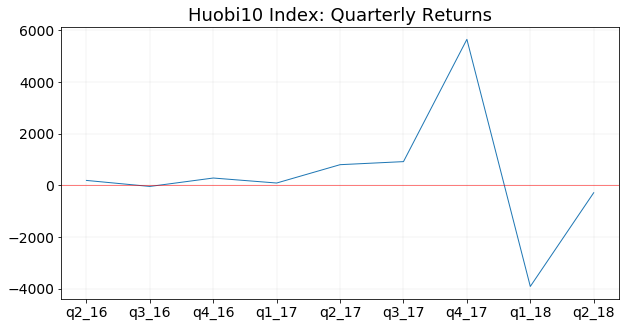

In [30]:
plt.plot(Q_Returns['Q_Returns'], linewidth = 1)
plt.plot()
plt.axhline(0, color='red', linewidth = 0.5)
plt.title('Huobi10 Index: Quarterly Returns', fontsize = 18)
plt.rcParams['figure.figsize'] = (10,5)
plt.grid(color='black', linestyle='-', linewidth=0.05)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

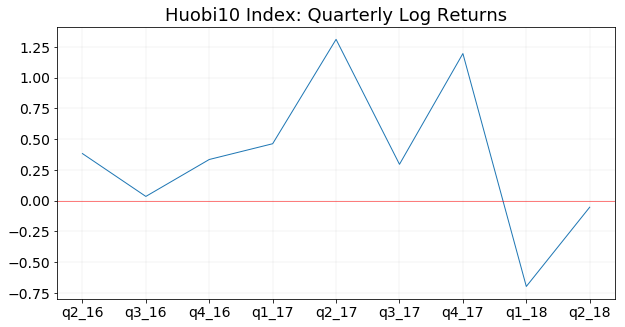

In [32]:
plt.plot(Q_Returns['Log Returns'], linewidth = 1)
plt.plot()
plt.axhline(0, color='red', linewidth = 0.5)
plt.title('Huobi10 Index: Quarterly Log Returns', fontsize = 18)
plt.rcParams['figure.figsize'] = (10,5)
plt.grid(color='black', linestyle='-', linewidth=0.05)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()